In [1]:
url_GME = "https://financialmodelingprep.com/api/v3/historical-price-full/GME?from=2016-03-14&to=2021-03-12&apikey=3972999437268fb45b9be4b1c38d4040"

In [2]:
url_AMC = "https://financialmodelingprep.com/api/v3/historical-price-full/AMC?from=2016-03-14&to=2021-03-12&apikey=3972999437268fb45b9be4b1c38d4040"

In [3]:
from urllib.request import urlopen
import json

def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

In [4]:
import csv
import pandas as pd
from pandas.io.json import json_normalize

## reading data from api and store as json

In [5]:
#reading data from api and store as json
GME = pd.read_json(url_GME)
AMC = pd.read_json(url_AMC)

#flatten json as dataframe
gme = json_normalize(GME['historical'])
amc = json_normalize(AMC['historical'])

<ipython-input-5-c96021ba96f8>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  gme = json_normalize(GME['historical'])
<ipython-input-5-c96021ba96f8>:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  amc = json_normalize(AMC['historical'])


## flatten json as dataframe

In [6]:
gme = json_normalize(GME['historical'])
amc = json_normalize(AMC['historical'])

<ipython-input-6-f6ff3a6ce65c>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  gme = json_normalize(GME['historical'])
<ipython-input-6-f6ff3a6ce65c>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  amc = json_normalize(AMC['historical'])


## Append ticker to dataframe

In [ ]:
# gme['ticker'] = 'GME'
# amc['ticker'] = 'AMC'

## Optional sort

In [ ]:
# gme.sort_values('date', inplace=True, ascending=True)
# print(gme)
# amc.sort_values('date', inplace=True, ascending=True)
# print(amc)

## Query 1: price changes in given range (supply 2 dates)

In [7]:
#Search date range
mask = (gme['date'] > '2020-01-01') & (gme['date'] <= '2021-01-01')
#GME
gme = gme.loc[mask] # get dataframe after filtering dates
gme

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
48,2020-12-31,19.250000,19.799999,18.799999,18.840000,18.840000,6922700.0,6922700.0,-0.41,-2.130,19.14667,"December 31, 20",-0.02130
49,2020-12-30,19.379999,20.000000,18.850000,19.260000,19.260000,5934400.0,5934400.0,-0.12,-0.619,19.37000,"December 30, 20",-0.00619
50,2020-12-29,20.820000,21.070000,18.559999,19.379999,19.379999,9241400.0,9241400.0,-1.44,-6.916,19.67000,"December 29, 20",-0.06916
51,2020-12-28,21.309999,21.969999,20.350000,20.990000,20.990000,8965900.0,8965900.0,-0.32,-1.502,21.10333,"December 28, 20",-0.01502
52,2020-12-24,21.010000,21.480000,19.950001,20.150000,20.150000,6262200.0,6262200.0,-0.86,-4.093,20.52667,"December 24, 20",-0.04093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2020-01-08,5.490000,5.850000,5.410000,5.720000,5.720000,5629400.0,5629400.0,0.23,4.189,5.66000,"January 08, 20",0.04189
297,2020-01-07,5.770000,5.830000,5.440000,5.520000,5.520000,5228000.0,5228000.0,-0.25,-4.333,5.59667,"January 07, 20",-0.04333
298,2020-01-06,5.800000,5.910000,5.600000,5.850000,5.850000,3394800.0,3394800.0,0.05,0.862,5.78667,"January 06, 20",0.00862
299,2020-01-03,6.210000,6.250000,5.840000,5.880000,5.880000,3543900.0,3543900.0,-0.33,-5.314,5.99000,"January 03, 20",-0.05314


In [8]:
# GME
amc = amc.loc[mask]
amc

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
48,2020-12-31,2.17,2.22,2.08,2.12,2.120000,28234300.0,28234300.0,-0.05,-2.304,2.14000,"December 31, 20",-0.02304
49,2020-12-30,2.30,2.30,2.13,2.16,2.160000,40278400.0,40278400.0,-0.14,-6.087,2.19667,"December 30, 20",-0.06087
50,2020-12-29,2.44,2.46,2.28,2.29,2.290000,21086100.0,21086100.0,-0.15,-6.148,2.34333,"December 29, 20",-0.06148
51,2020-12-28,2.63,2.63,2.36,2.39,2.390000,23942700.0,23942700.0,-0.24,-9.125,2.46000,"December 28, 20",-0.09125
52,2020-12-24,2.59,2.60,2.48,2.51,2.510000,11094200.0,11094200.0,-0.08,-3.089,2.53000,"December 24, 20",-0.03089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2020-01-08,7.11,7.15,6.61,6.62,6.579634,6557000.0,6557000.0,-0.49,-6.892,6.79333,"January 08, 20",-0.06892
297,2020-01-07,7.11,7.20,7.00,7.13,7.086524,3205300.0,3205300.0,0.02,0.281,7.11000,"January 07, 20",0.00281
298,2020-01-06,7.25,7.30,7.11,7.12,7.076585,2903400.0,2903400.0,-0.13,-1.793,7.17667,"January 06, 20",-0.01793
299,2020-01-03,7.45,7.60,7.31,7.32,7.275366,2218000.0,2218000.0,-0.13,-1.745,7.41000,"January 03, 20",-0.01745


In [9]:
# visualization
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "Malgun Gothic"
price_detail_gme = gme.groupby('date')['close'].sum()
price_detail_gme

price_detail_amc = amc.groupby('date')['close'].sum()
price_detail_amc

date
2020-01-02    7.46
2020-01-03    7.32
2020-01-06    7.12
2020-01-07    7.13
2020-01-08    6.62
              ... 
2020-12-24    2.51
2020-12-28    2.39
2020-12-29    2.29
2020-12-30    2.16
2020-12-31    2.12
Name: close, Length: 253, dtype: float64

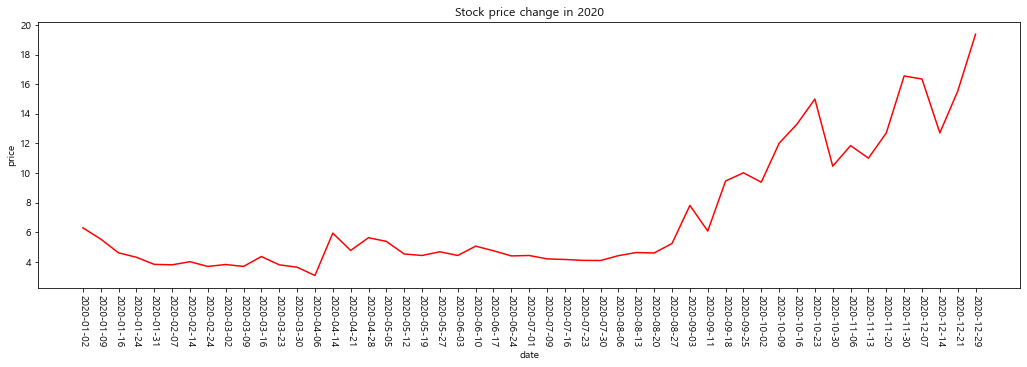

In [10]:
# GME stock price change
plt.figure(figsize=(15,5))
y=price_detail_gme[::5]
x=price_detail_gme.index[::5]

plt.locator_params(axis='x', nbins=len(x)/2)
plt.plot(x, y, 'g-', color='red')
plt.tight_layout(pad=4)
plt.subplots_adjust(bottom=0.15)
plt.title('Stock price change in 2020')
plt.xlabel('date')
plt.ylabel('price')
plt.xticks(rotation=-90)
plt.show()

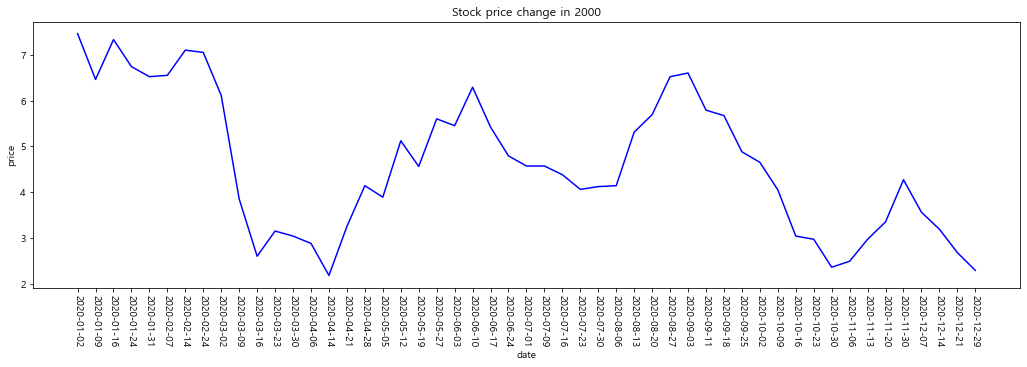

In [11]:
# AMC stock price change
plt.figure(figsize=(15,5))
z=price_detail_amc[::5]
x=price_detail_amc.index[::5]

plt.locator_params(axis='x', nbins=len(x)/2)
plt.plot(x, z, 'g-', color='blue')
plt.tight_layout(pad=4)
plt.subplots_adjust(bottom=0.15)
plt.title('Stock price change in 2000')
plt.xlabel('date')
plt.ylabel('price')
plt.xticks(rotation=-90)
plt.show()

## Query 2: top n most active dates

In [13]:
n = 10
gme.sort_values('volume', inplace=True, ascending=False)
gme_vol = gme.nlargest(n, 'volume')
gme_vol

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
105,2020-10-09,12.830000,14.800000,11.900000,12.020000,12.020000,77152800.0,77152800.0,-0.81,-6.313,12.90667,"October 09, 20",-0.06313
106,2020-10-08,9.540000,13.640000,9.190000,13.490000,13.490000,76453600.0,76453600.0,3.95,41.405,12.10667,"October 08, 20",0.41405
101,2020-10-15,11.990000,15.100000,11.990000,13.830000,13.830000,39894800.0,39894800.0,1.84,15.346,13.64000,"October 15, 20",0.15346
133,2020-08-31,5.770000,7.150000,5.690000,6.680000,6.680000,37976000.0,37976000.0,0.91,15.771,6.50667,"August 31, 20",0.15771
118,2020-09-22,10.450000,11.170000,9.900000,10.560000,10.560000,34752500.0,34752500.0,0.11,1.053,10.54333,"September 22, 20",0.01053
70,2020-11-30,18.170000,19.420000,16.559999,16.559999,16.559999,31983500.0,31983500.0,-1.61,-8.861,17.51333,"November 30, 20",-0.08861
54,2020-12-22,16.219999,20.040001,16.150000,19.459999,19.459999,30652700.0,30652700.0,3.24,19.975,18.55000,"December 22, 20",0.19975
53,2020-12-23,20.170000,22.350000,19.129999,20.570000,20.570000,25830300.0,25830300.0,0.40,1.983,20.68333,"December 23, 20",0.01983
63,2020-12-09,13.920000,14.730000,13.230000,13.660000,13.660000,24357900.0,24357900.0,-0.26,-1.868,13.87333,"December 09, 20",-0.01868
104,2020-10-12,11.660000,12.770000,11.400000,11.800000,11.800000,23655700.0,23655700.0,0.14,1.201,11.99000,"October 12, 20",0.01201


In [14]:
amc.sort_values('volume', inplace=True, ascending=False)
amc_vol = amc.nlargest(n, 'volume')
amc_vol

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
84,2020-11-09,4.27,4.39,3.23,3.77,3.77,132511000.0,132511000.0,-0.50,-11.710,3.79667,"November 09, 20",-0.11710
211,2020-05-11,6.40,6.41,4.89,5.32,5.32,106553300.0,106553300.0,-1.08,-16.875,5.54000,"May 11, 20",-0.16875
60,2020-12-14,4.01,4.01,3.00,3.19,3.19,67159000.0,67159000.0,-0.82,-20.449,3.40000,"December 14, 20",-0.20449
67,2020-12-03,4.01,4.22,3.50,3.63,3.63,66080900.0,66080900.0,-0.38,-9.476,3.78333,"December 03, 20",-0.09476
73,2020-11-24,4.16,5.00,4.15,4.58,4.58,62884600.0,62884600.0,0.42,10.096,4.57667,"November 24, 20",0.10096
59,2020-12-15,3.24,3.24,2.76,2.86,2.86,54432100.0,54432100.0,-0.38,-11.728,2.95333,"December 15, 20",-0.11728
79,2020-11-16,3.39,3.39,3.05,3.11,3.11,47604300.0,47604300.0,-0.28,-8.260,3.18333,"November 16, 20",-0.08260
131,2020-09-02,7.01,7.71,6.46,7.04,7.04,43056200.0,43056200.0,0.03,0.428,7.07000,"September 02, 20",0.00428
83,2020-11-10,3.99,4.03,3.34,3.51,3.51,42129300.0,42129300.0,-0.48,-12.030,3.62667,"November 10, 20",-0.12030
99,2020-10-19,3.31,3.88,3.23,3.54,3.54,40385100.0,40385100.0,0.23,6.949,3.55000,"October 19, 20",0.06949


In [15]:
import pandas as pd
volume_detail_gme = gme_vol.groupby('date')['volume'].sum()
volume_detail_gme
volume_detail_amc = amc_vol.groupby('date')['volume'].sum()
volume_detail_amc

date
2020-05-11    106553300.0
2020-09-02     43056200.0
2020-10-19     40385100.0
2020-11-09    132511000.0
2020-11-10     42129300.0
2020-11-16     47604300.0
2020-11-24     62884600.0
2020-12-03     66080900.0
2020-12-14     67159000.0
2020-12-15     54432100.0
Name: volume, dtype: float64

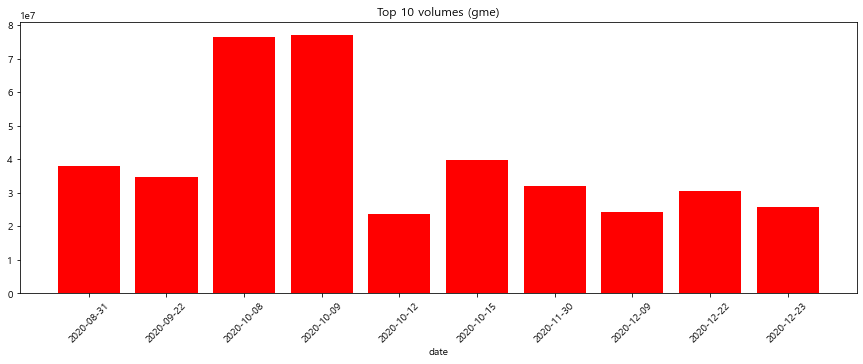

In [16]:
# visualization
plt.figure(figsize=(15,5))
y=volume_detail_gme
x=volume_detail_gme.index

plt.bar(x, y, color='red')

plt.xlabel('date')
plt.xticks(rotation=45)
plt.title('Top 10 volumes (gme)')
plt.show()

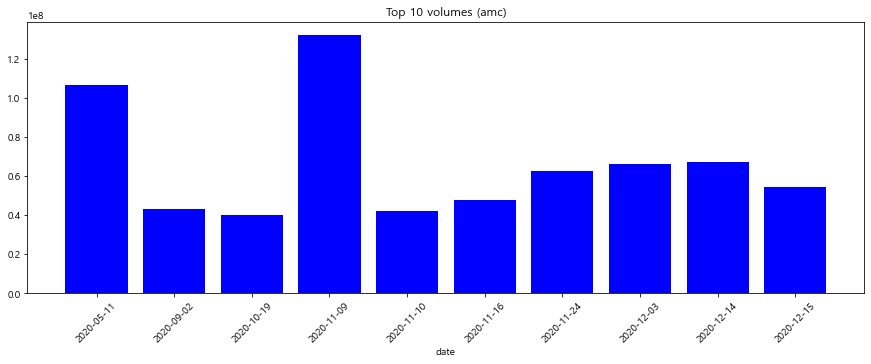

In [17]:
# visualization
plt.figure(figsize=(15,5))
z=volume_detail_amc
x=volume_detail_amc.index

plt.bar(x, z, color='blue')

plt.xlabel('date')
plt.xticks(rotation=45)
plt.title('Top 10 volumes (amc)')
plt.show()

## store data by exporting as csv somewhere for visualization re: Prof's comments

In [ ]:
# query1.to_csv('query1.csv')
# query2.to_csv('query2.csv')
# query3.to_csv('query3.csv')